In [3]:
import numpy as np
import sklearn.datasets
import umap
import umap.plot
import umap.utils as utils
import umap.aligned_umap
import matplotlib.pyplot as plt

In [4]:
digits = sklearn.datasets.load_digits()

In [5]:
ordered_digits = digits.data[np.argsort(digits.data.sum(axis=1))]
ordered_target = digits.target[np.argsort(digits.data.sum(axis=1))]
print(ordered_target)
slices = [ordered_digits[150 * i:min(ordered_digits.shape[0], 150 * i + 400)] for i in range(10)]
slices

[1 5 1 ... 1 1 1]


[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 7., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 9., ..., 8., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[ 0.,  0.,  5., ...,  4.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  7., ...,  5.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 12.,  1.,  0.],
        [ 0.,  0.,  2., ...,  6.,  0.,  0.],
        [ 0.,  0., 11., ..., 12.,  5.,  0.]]),
 array([[ 0.,  0.,  4., ...,  1.,  0.,  0.],
        [ 0.,  0.,  7., ...,  0.,  0.,  0.],
        [ 0.,  0., 10., ..., 10.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  2.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  0.,  3., ..., 16.,  4.,  0.]]),
 array([[ 0.,  0.,  6., ..., 12.,  1.,  0.],
        [ 0.,  0.,  9., ...,  5.,  0.,  0.],
        [ 0.,  1., 12., ...,  1.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  2.,

In [6]:
relation_dict = {i+150:i for i in range(400-150)}
relation_dicts = [relation_dict.copy() for i in range(len(slices) - 1)]
relation_dicts

[{150: 0,
  151: 1,
  152: 2,
  153: 3,
  154: 4,
  155: 5,
  156: 6,
  157: 7,
  158: 8,
  159: 9,
  160: 10,
  161: 11,
  162: 12,
  163: 13,
  164: 14,
  165: 15,
  166: 16,
  167: 17,
  168: 18,
  169: 19,
  170: 20,
  171: 21,
  172: 22,
  173: 23,
  174: 24,
  175: 25,
  176: 26,
  177: 27,
  178: 28,
  179: 29,
  180: 30,
  181: 31,
  182: 32,
  183: 33,
  184: 34,
  185: 35,
  186: 36,
  187: 37,
  188: 38,
  189: 39,
  190: 40,
  191: 41,
  192: 42,
  193: 43,
  194: 44,
  195: 45,
  196: 46,
  197: 47,
  198: 48,
  199: 49,
  200: 50,
  201: 51,
  202: 52,
  203: 53,
  204: 54,
  205: 55,
  206: 56,
  207: 57,
  208: 58,
  209: 59,
  210: 60,
  211: 61,
  212: 62,
  213: 63,
  214: 64,
  215: 65,
  216: 66,
  217: 67,
  218: 68,
  219: 69,
  220: 70,
  221: 71,
  222: 72,
  223: 73,
  224: 74,
  225: 75,
  226: 76,
  227: 77,
  228: 78,
  229: 79,
  230: 80,
  231: 81,
  232: 82,
  233: 83,
  234: 84,
  235: 85,
  236: 86,
  237: 87,
  238: 88,
  239: 89,
  240: 90,
  241: 91

In [7]:
aligned_mapper = umap.AlignedUMAP().fit(slices, relations=relation_dicts)

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [8]:
def axis_bounds(embedding):
    left, right = embedding.T[0].min(), embedding.T[0].max()
    bottom, top = embedding.T[1].min(), embedding.T[1].max()
    adj_h, adj_v = (right - left) * 0.1, (top - bottom) * 0.1
    return [left - adj_h, right + adj_h, bottom - adj_v, top + adj_v]

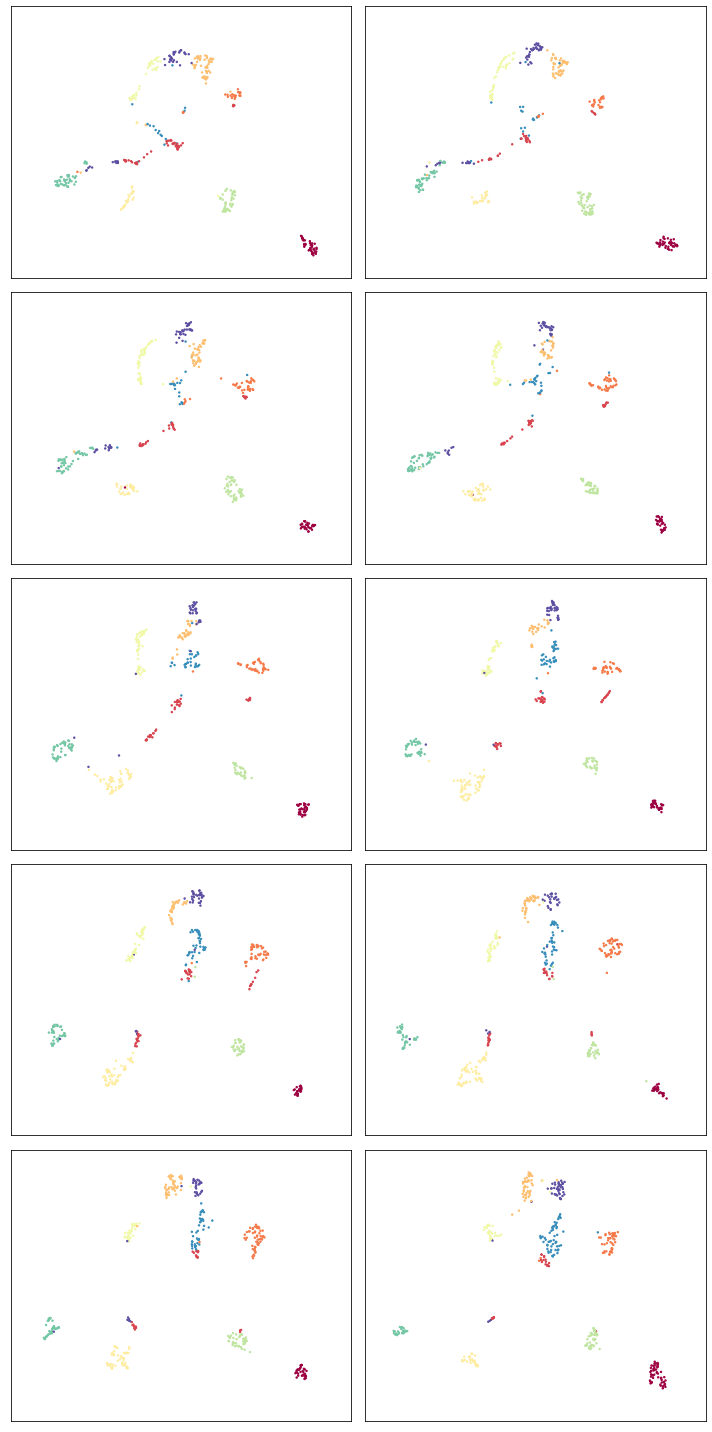

In [9]:
fig, axs = plt.subplots(5,2, figsize=(10, 20))
ax_bound = axis_bounds(np.vstack(aligned_mapper.embeddings_))
for i, ax in enumerate(axs.flatten()):
    current_target = ordered_target[150 * i:min(ordered_target.shape[0], 150 * i + 400)]
    ax.scatter(*aligned_mapper.embeddings_[i].T, s=2, c=current_target, cmap="Spectral")
    ax.axis(ax_bound)
    ax.set(xticks=[], yticks=[])
plt.tight_layout()

[1 5 1 1 1 1 7 1 1 1 7 1 1 1 5 1 4 4 7 7 1 5 7 3 6 7 2 7 7 1 8 7 5 6 2 7 3
 0 3 1 8 9 3 7 5 6 5 1 2 2 5 2 4 7 9 0 3 1 3 7 7 4 2 4 7 4 6 9 3 8 3 4 3 6
 3 3 7 3 0 4 0 3 6 3 7 2 4 2 6 2 0 2 3 9 6 3 3 0 6 4 7 4 4 9 9 8 6 1 3 4 1
 9 2 6 1 9 4 0 0 7 6 2 3 5 0 1 1 6 9 9 6 1 6 5 2 9 1 9 2 5 4 3 6 0 0 3 0 5
 9 3 0 4 5 6 5 0 9 2 5 2 9 4 0 8 1 7 0 3 7 3 6 4 3 2 8 9 1 3 0 5 4 3 1 7 1
 4 3 5 9 1 9 9 3 1 9 5 3 3 1 5 9 5 0 6 4 7 5 7 6 4 0 1 3 5 5 4 6 2 6 3 3 9
 9 6 4 2 2 7 0 5 6 2 0 7 0 8 3 4 5 7 0 7 9 9 6 1 0 0 5 8 5 0 5 1 7 1 6 3 7
 6 9 1 8 7 1 9 4 3 9 6 0 3 6 0 3 0 7 0 9 8 1 9 1 7 0 3 7 1 2 5 3 8 3 4 3 7
 8 9 6 5 0 7 3 7 0 8 9 6 3 6 2 4 3 0 3 6 2 0 3 0 7 3 3 2 1 7 3 5 1 7 6 5 9
 0 5 6 5 8 0 3 1 8 9 4 7 6 0 7 6 6 5 5 9 0 6 5 2 1 9 9 9 5 9 5 1 1 1 6 7 7
 3 9 5 3 7 8 3 4 5 5 0 3 1 5 7 6 1 0 9 7 2 9 6 6 7 0 6 3 4 4]
[0 4 5 6 5 0 9 2 5 2 9 4 0 8 1 7 0 3 7 3 6 4 3 2 8 9 1 3 0 5 4 3 1 7 1 4 3
 5 9 1 9 9 3 1 9 5 3 3 1 5 9 5 0 6 4 7 5 7 6 4 0 1 3 5 5 4 6 2 6 3 3 9 9 6
 4 2 2 7 0 5 6 2 0 7 0 8 3 4 5 7 0 7 9

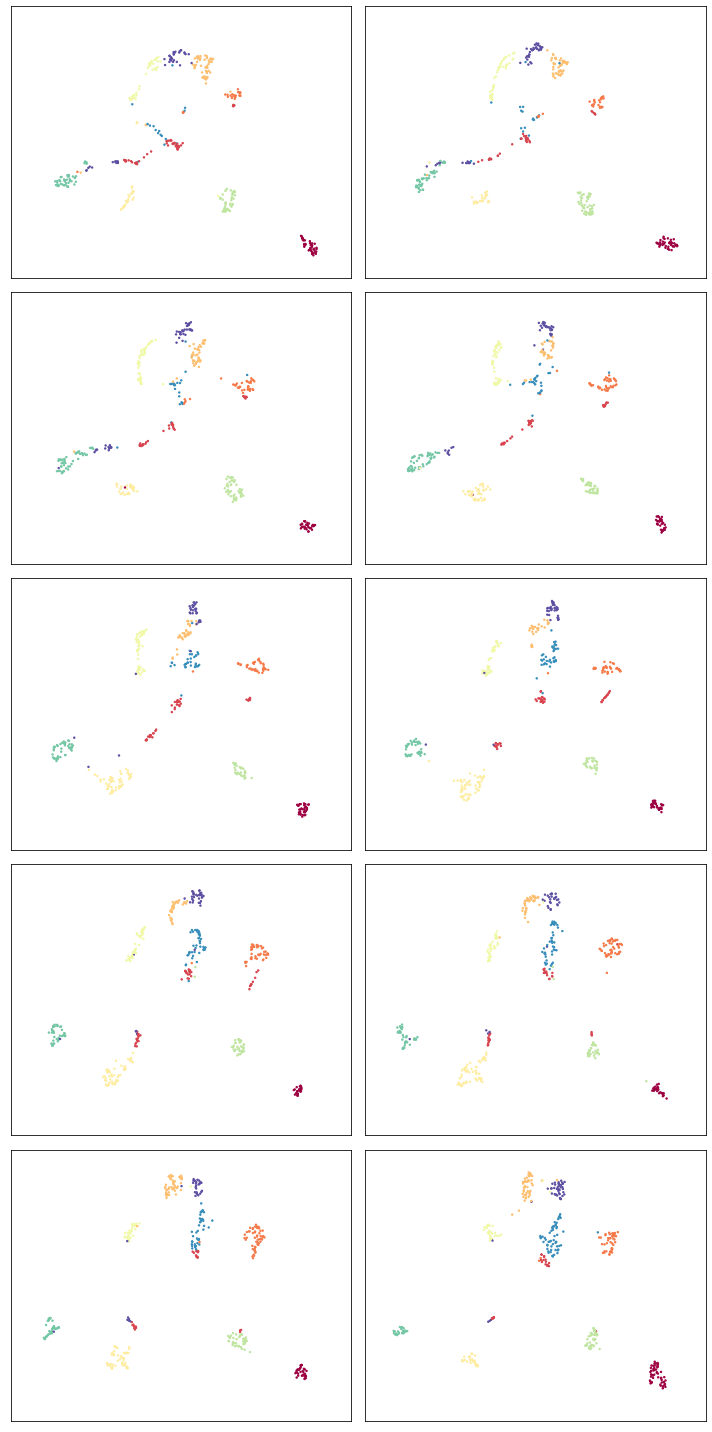

In [10]:
fig, axs = plt.subplots(5,2, figsize=(10, 20))
ax_bound = axis_bounds(np.vstack(aligned_mapper.embeddings_))
for i, ax in enumerate(axs.flatten()):
    current_target = ordered_target[150 * i:min(ordered_target.shape[0], 150 * i + 400)]
    print(current_target)
    ax.scatter(*aligned_mapper.embeddings_[i].T, s=2, c=current_target, cmap="Spectral")
    ax.axis(ax_bound)
    ax.set(xticks=[], yticks=[])
plt.tight_layout()